**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [42]:
#Import all the neccessary libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [43]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [44]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = 'gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [45]:
#Count of train and test images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Number of images in train",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Number of images in test",image_count_test)

Number of images in train 2239
Number of images in test 118
Number of images in train 2239
Number of images in test 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [46]:
#Initializing batch size,image height and width
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [47]:
#Creating train dataset using seed=123 and other parameters
train_ds = image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [48]:
#Creating valiation dataset using seed=123 and other parameters
val_ds =image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [49]:
#Loading all the classes and printing them
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

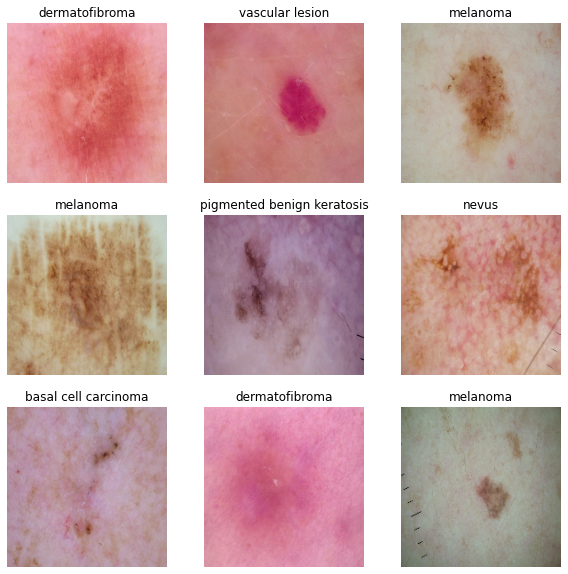

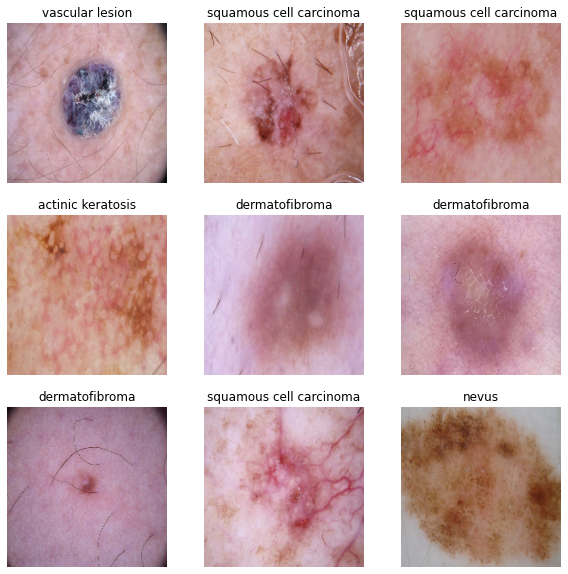

In [50]:
#Visualize training or validation data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [51]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [52]:
# Lets build sequential model 
num_classes = 9 
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [53]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [55]:
#Fit the model
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 324s 668ms/step - loss: 1.8219 - accuracy: 0.3116 - val_loss: 1.7134 - val_accuracy: 0.3905
Epoch 2/20
169/169 [==============================] - 4s 24ms/step - loss: 1.4648 - accuracy: 0.4479 - val_loss: 1.3920 - val_accuracy: 0.4439
Epoch 3/20
169/169 [==============================] - 4s 23ms/step - loss: 1.2600 - accuracy: 0.5299 - val_loss: 1.1965 - val_accuracy: 0.5531
Epoch 4/20
169/169 [==============================] - 4s 23ms/step - loss: 1.1173 - accuracy: 0.5905 - val_loss: 1.1002 - val_accuracy: 0.6043
Epoch 5/20
169/169 [==============================] - 4s 23ms/step - loss: 0.9769 - accuracy: 0.6461 - val_loss: 1.0807 - val_accuracy: 0.6273
Epoch 6/20
169/169 [==============================] - 4s 23ms/step - loss: 0.8426 - accuracy: 0.6983 - val_loss: 0.9656 - val_accuracy: 0.6355
Epoch 7/20
169/169 [==============================] - 4s 23ms/step - loss: 0.7282 - accuracy: 0.7370 - val_loss: 1.0529 - val_accuracy: 0.6

### Visualizing training results

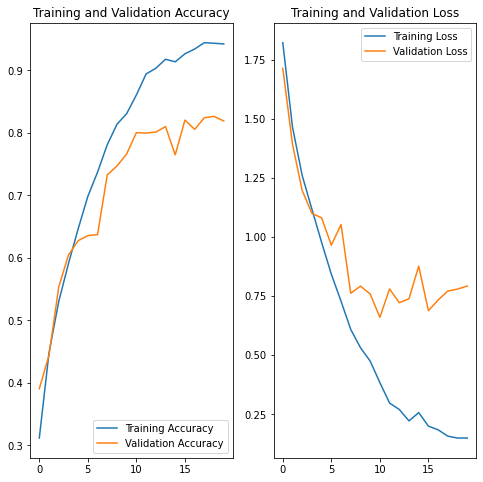

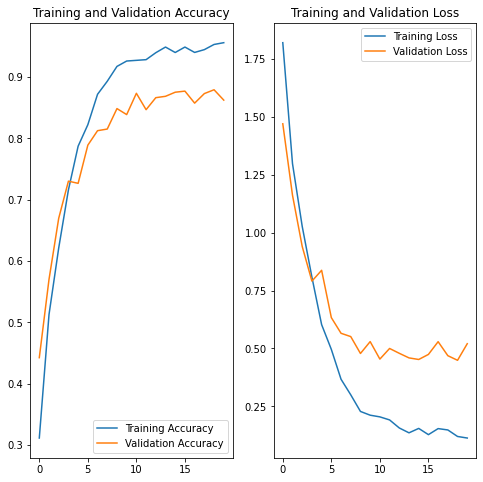

In [56]:
#Plot the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:

1. As we observe on the plot above with increase in number of epochs, training accuracy increases and validation acuracy decreases.
2. Also we observe on the plot above with increase in number of epochs,validation loss increases and training loss decreases.
3. Training accuray - 86%
4. Validation accuracy - 53%
5. There is extreme difference between training and validation accuaracy.The model performs well on training dataset and not perform well on validation dataset. 

**Thus ,the model is Overfitting**

### Data Augmentaion

In [57]:
#Building a layer which performs random rotation 
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])

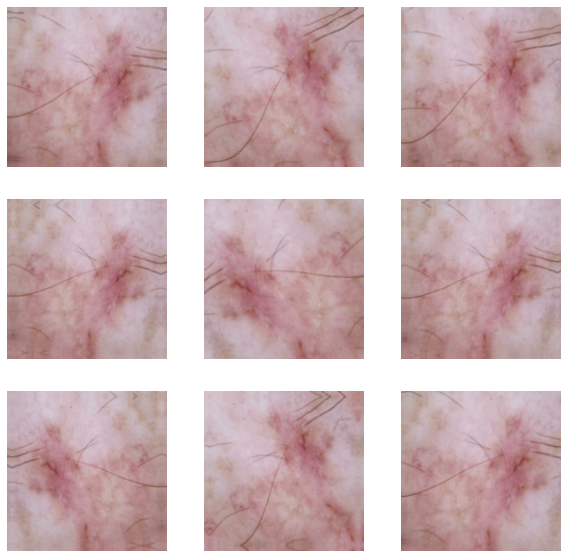

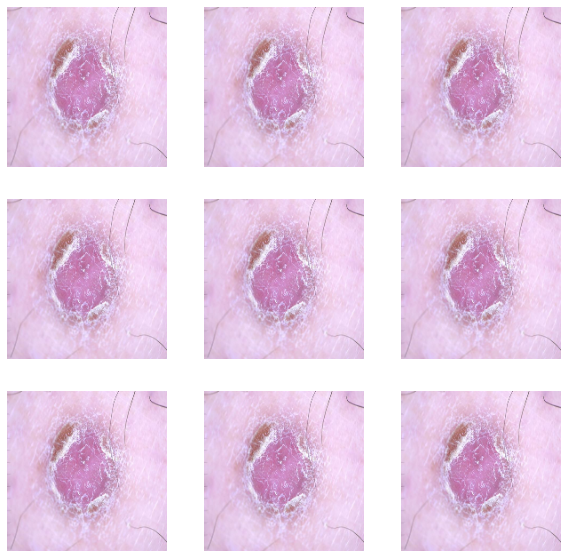

In [58]:
#visualize how augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Create the model, compile and train the model

In [59]:
#We can use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [60]:
#Complie the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
#Fit the model
%%time
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 5s 26ms/step - loss: 1.8247 - accuracy: 0.3008 - val_loss: 1.6049 - val_accuracy: 0.3838
Epoch 2/20
169/169 [==============================] - 4s 25ms/step - loss: 1.5046 - accuracy: 0.4121 - val_loss: 1.4889 - val_accuracy: 0.4202
Epoch 3/20
169/169 [==============================] - 4s 25ms/step - loss: 1.4095 - accuracy: 0.4601 - val_loss: 1.3037 - val_accuracy: 0.5122
Epoch 4/20
169/169 [==============================] - 4s 25ms/step - loss: 1.3164 - accuracy: 0.4892 - val_loss: 1.3193 - val_accuracy: 0.4989
Epoch 5/20
169/169 [==============================] - 4s 25ms/step - loss: 1.2502 - accuracy: 0.5167 - val_loss: 1.1797 - val_accuracy: 0.5635
Epoch 6/20
169/169 [==============================] - 4s 25ms/step - loss: 1.2022 - accuracy: 0.5425 - val_loss: 1.2238 - val_accuracy: 0.5278
Epoch 7/20
169/169 [==============================] - 4s 25ms/step - loss: 1.1440 - accuracy: 0.5608 - val_loss: 1.1210 - val_accuracy: 0.5702

### Visualizing the results

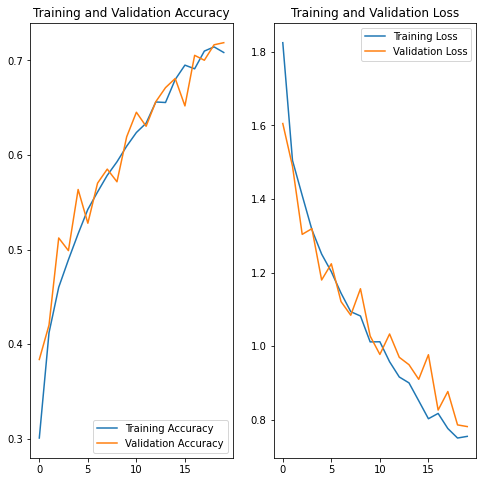

In [21]:
#Plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- Overfitting is avoided.
- Accuracy of Training and validation dataset is of slmost same range.
- It is underfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [22]:

from glob import glob
list_of_path = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))

2239


In [23]:
df_dict_original = dict(zip(list_of_path, lesion_list))
print(list(df_dict_original.items())[:2])

[('gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0025471.jpg', 'squamous cell carcinoma'), ('gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/ISIC_0025696.jpg', 'squamous cell carcinoma')]


In [24]:
main_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
main_df.head()

,Path,Label
0,gdrive/My Drive/Colab Notebooks/Melanoma Detec...,squamous cell carcinoma
1,gdrive/My Drive/Colab Notebooks/Melanoma Detec...,squamous cell carcinoma
2,gdrive/My Drive/Colab Notebooks/Melanoma Detec...,squamous cell carcinoma
3,gdrive/My Drive/Colab Notebooks/Melanoma Detec...,squamous cell carcinoma
4,gdrive/My Drive/Colab Notebooks/Melanoma Detec...,squamous cell carcinoma


In [25]:
main_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
dtype: int64

- These are the no of images present currently. We will add more images to avoid underfitting

In [26]:
main_df[['Label']].value_counts(normalize=True)


Label                     
pigmented benign keratosis    0.206342
melanoma                      0.195623
basal cell carcinoma          0.167932
nevus                         0.159446
squamous cell carcinoma       0.080840
vascular lesion               0.062081
actinic keratosis             0.050916
dermatofibroma                0.042430
seborrheic keratosis          0.034390
dtype: float64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
- seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
- pigmented benign keratosis and melanoma

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [27]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [28]:
tarining_ds_path=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(tarining_ds_path + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F397ADEDD50>: 100%|██████████| 500/500 [00:19<00:00, 25.60 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F397D0EB390>: 100%|██████████| 500/500 [00:20<00:00, 23.95 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F397D04D190>: 100%|██████████| 500/500 [00:21<00:00, 22.99 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F397D03EC10>: 100%|██████████| 500/500 [01:34<00:00,  5.29 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F3992065090>: 100%|██████████| 500/500 [01:24<00:00,  5.91 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F397AD14BD0>: 100%|██████████| 500/500 [00:18<00:00, 27.70 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F397ADA3390>: 100%|██████████| 500/500 [00:40<00:00, 12.23 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F3992064810>: 100%|██████████| 500/500 [00:17<00:00, 28.29 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F397D066390>: 100%|██████████| 500/500 [00:17<00:00, 28.19 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
list_of_path_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
list_of_path_new

['gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030158.jpg_d4b75109-755f-4b78-ac24-1af75f82aff6.jpg',
 'gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031286.jpg_d5465b2b-f8ff-4f71-a217-aefb9b1b676e.jpg',
 'gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0027231.jpg_dc68b07e-fa29-4b15-b562-1b5e0b2384f0.jpg',
 'gdrive/My Drive/Colab Notebooks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0028232.jpg_687fcedc-7094-4dc8-

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [32]:
dataframe_dict = dict(zip(list_of_path_new, lesion_list_new))

In [33]:
df_new = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
new_df = main_df.append(df_new)

In [34]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [35]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [36]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


####Create a validation dataset

In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [38]:
# ## your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])



#### Compile the model 

In [39]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train your model

In [40]:
%%time
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
281/281 [==============================] - 60s 205ms/step - loss: 1.7899 - accuracy: 0.3312 - val_loss: 1.4190 - val_accuracy: 0.4628
Epoch 2/30
281/281 [==============================] - 49s 171ms/step - loss: 1.3975 - accuracy: 0.4661 - val_loss: 1.3039 - val_accuracy: 0.5100
Epoch 3/30
281/281 [==============================] - 47s 164ms/step - loss: 1.2843 - accuracy: 0.5113 - val_loss: 1.1965 - val_accuracy: 0.5714
Epoch 4/30
281/281 [==============================] - 47s 163ms/step - loss: 1.1927 - accuracy: 0.5413 - val_loss: 1.2003 - val_accuracy: 0.5465
Epoch 5/30
281/281 [==============================] - 47s 163ms/step - loss: 1.1355 - accuracy: 0.5642 - val_loss: 1.0024 - val_accuracy: 0.6346
Epoch 6/30
281/281 [==============================] - 46s 162ms/step - loss: 1.0321 - accuracy: 0.6092 - val_loss: 1.0457 - val_accuracy: 0.6084
Epoch 7/30
281/281 [==============================] - 47s 164ms/step - loss: 0.9718 - accuracy: 0.6341 - val_loss: 0.8718 - val_ac

#### **Todo:**  Visualize the model results

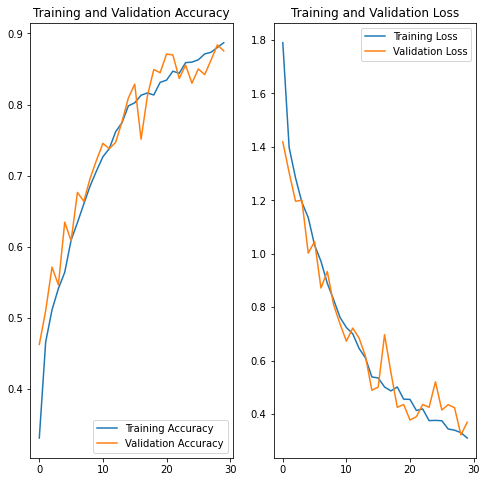

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**Findings**

- We observed the model was no more underfitting, with training accuracy of 88%.
- We observed that validation accuracy was 87% which was very close to training accuracy. There is no overfitting too.
- Accuracy was reduced due to difference between images, it can be rectified with more number of epochs while training model.
- Inclusion of batch normalization is degrading the accuracy of the final model, hence it is not used.
- In this model class rebalance helped us to improve the accuracy.